In [3]:
#ZOMATO DATA ANALYSIS PROECT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data_frame =pd.read_csv("Zomato data .csv")

In [54]:
data_frame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [56]:
def handlerate(value):
    value=str(value).split('/')
    value= value[0];
    return float(value)
data_frame['rate']= data_frame['rate'].apply(handlerate)
print (data_frame.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [58]:
data_frame.info

<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

Text(0.5, 0, 'type of restaurent')

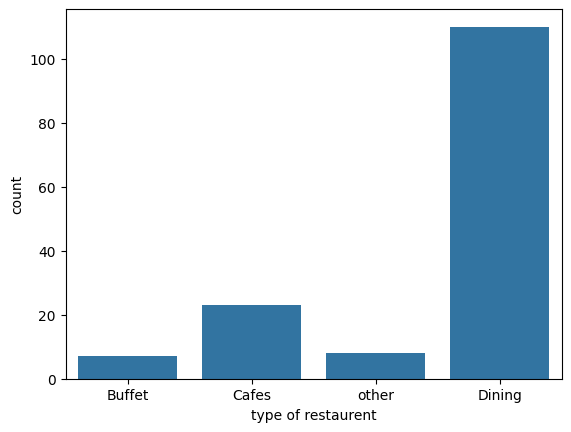

In [64]:
sns.countplot(x= data_frame['listed_in(type)'])
plt.xlabel("type of restaurent")

Text(0, 0.5, 'votes')

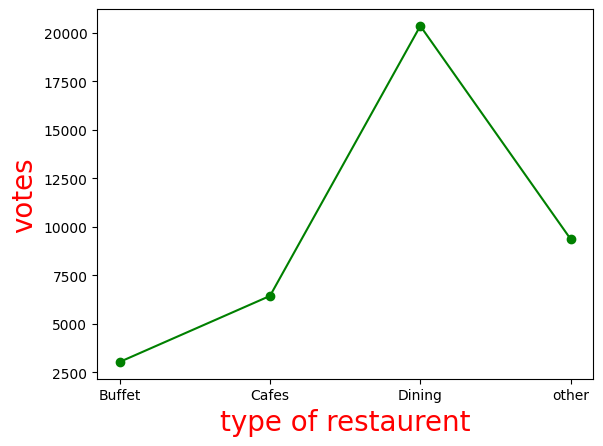

In [66]:
grouped_data= data_frame.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes':grouped_data})
plt.plot(result, c= "green", marker="o")
plt.xlabel("type of restaurent", c="red", size=20)
plt.ylabel("votes", c="red", size=20)


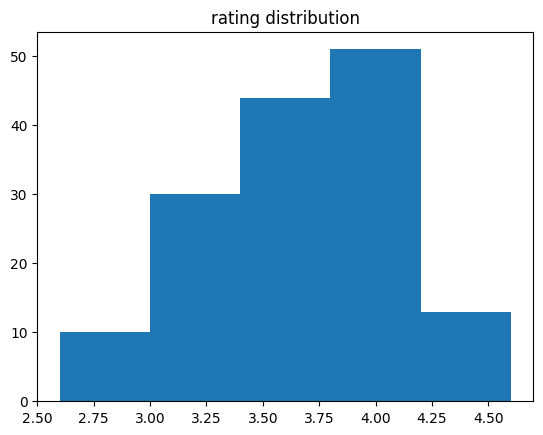

In [68]:
plt.hist(data_frame['rate'], bins=5)
plt.title("rating distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

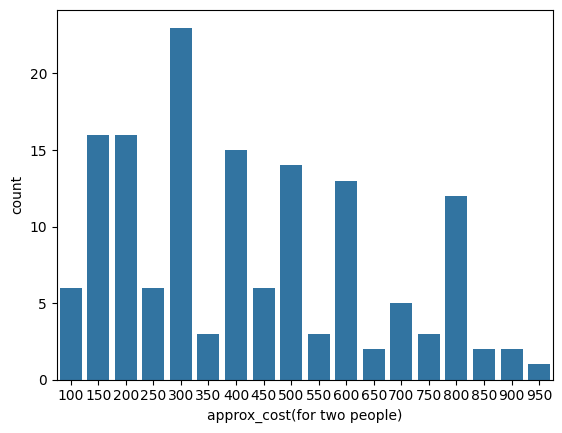

In [70]:
couple_data= data_frame['approx_cost(for two people)']
sns.countplot(x= couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

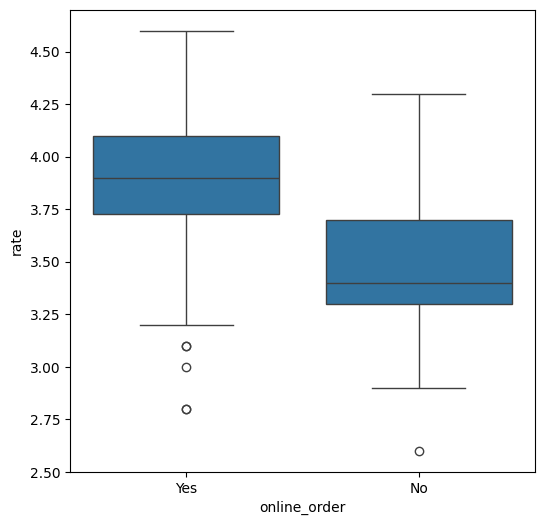

In [72]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y= "rate", data= data_frame)

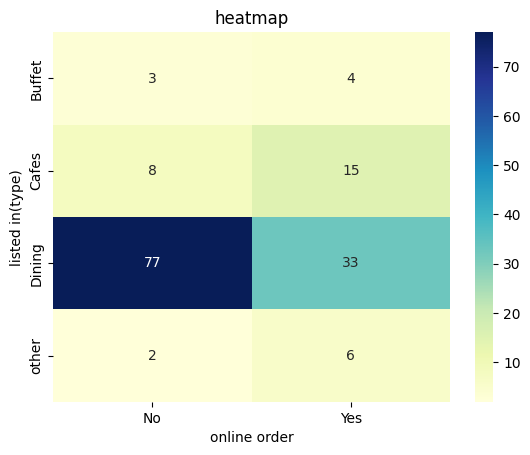

In [74]:
pivot_table= data_frame.pivot_table(index="listed_in(type)", columns="online_order", aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed in(type)")
plt.show()